In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import fetch_census_data
import spatial_operations

In [3]:
data = fetch_census_data.acs5_aggregate()

In [4]:
data.head()

,estimated total population,estimated total with internet subscription,estimated total with no internet access,estimated total has a computer,estimated total has no computer,state,county,tract
0,1825,392,149,426,149,17,31,630200
1,5908,1242,231,1411,133,17,31,580700
2,3419,928,140,1068,104,17,31,590600
3,2835,917,138,1003,81,17,31,600700
4,1639,322,245,356,218,17,31,611900


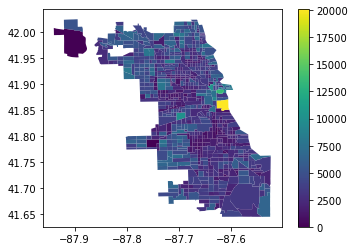

In [5]:
spatial_operations.map(data,'estimated total population','tract')

In [8]:
community_area_data = spatial_operations.aggregate(data,{'estimated total population' : 'areal sum'},'tract','community_area')
community_area_data.head()

,community_area,estimated total population
0,ALBANY PARK,49961.187298
1,ARCHER HEIGHTS,13813.340737
2,ARMOUR SQUARE,13615.114045
3,ASHBURN,43493.698832
4,AUBURN GRESHAM,45990.552782


Note: these community area estimates are very close to the "actual" populations per online. The most populous neighborhoods are Near North Side, Lakeview, and Austin, which are also the brightest colors in the map below.

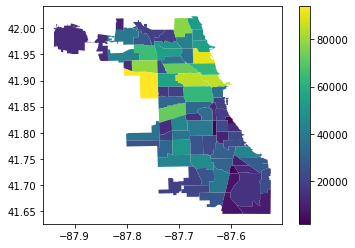

In [9]:
spatial_operations.map(community_area_data,'estimated total population','community_area')